In [14]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load the Dataset
# Load the dataset
data = pd.read_csv('C:/Users/adhar/Jupiter notebook/Python/Data Analsis/Data-analysis/PCA/ilpd_data.csv')


In [16]:
# Preprocess the Data
# Convert GENDER to numerical values (0 for Male, 1 for Female)
data['GENDER'] = data['GENDER'].map({'Male': 0, 'Female': 1})

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# Separate features and target variable
X = data.drop(columns=['SELECTOR'])  # Features
y = data['SELECTOR']  # Target variable (1 for liver disease, 2 for healthy)
y = y.map({1: 1, 2: 0})  # Convert to binary classification (1 for disease, 0 for healthy)


In [17]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# Make Predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)


In [20]:
# Evaluate Random Forest Model
print("Random Forest Model Evaluation:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Model Evaluation:
[[ 7 23]
 [15 70]]
              precision    recall  f1-score   support

           0       0.32      0.23      0.27        30
           1       0.75      0.82      0.79        85

    accuracy                           0.67       115
   macro avg       0.54      0.53      0.53       115
weighted avg       0.64      0.67      0.65       115

Accuracy: 0.6695652173913044


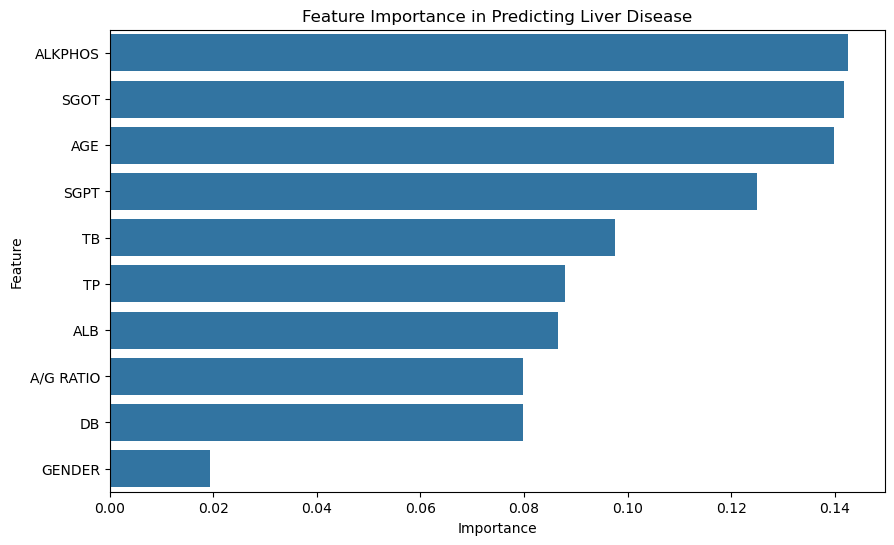

In [21]:
# Analyze Feature Importance
# Get feature importances from the model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Predicting Liver Disease')
plt.show()
